In [1]:
#installed python packages
!pip install pdfplumber
import pdfplumber
import pandas as pd
import numpy as np
import os
import time
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.6 MB/s eta 0:00:00


In [2]:
# This functions extracts the data form the PDF given in the data folder
def extract_information(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        resume_text = ""
        for page in pdf.pages:
            resume_text += page.extract_text()
    resume_text = resume_text.strip()
    return resume_text

# Regex to Extract Skills and Education from extracted text

In [3]:
#This functions extracts the required skills and educations from the PDF.


def extract_details(resume_text):

    # Define regular expressions to extract skills and education
    skills_pattern = r'Skills\n([\s\S]*?)(?=\n[A-Z]|$)'
    education_pattern = r'Education\n([\s\S]*?)(?=\n[A-Z][a-z]*\n|$)'

    # Get skills and education
    skills_match = re.findall(skills_pattern, resume_text, re.DOTALL)
    education_match = re.findall(education_pattern, resume_text, re.DOTALL)

    # If no skills or education were found, return None
    if len(skills_match) == 0 and len(education_match) == 0:
        return None

    # Extract the skills and education
    skills = skills_match[0] if len(skills_match) > 0 else None
    education = education_match[0] if len(education_match) > 0 else None

    return {
        'Skills': skills,
        'Education': education,
    }


# Extracting Resumes

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_folder = '/content/drive/My Drive/data'
resume_data = []

# Iterate through sub-folders and PDF files
start_time = time.time()

for category_folder in os.listdir(data_folder):
    category_path = os.path.join(data_folder, category_folder)
    if os.path.isdir(category_path):
        for pdf_file in os.listdir(category_path):
            if pdf_file.endswith('.pdf'):
                pdf_path = os.path.join(category_path, pdf_file)

                # Extract information from the PDF file
                text = extract_information(pdf_path)
                details = extract_details(text)

                # Add category and ID to the details
                if details is not None:
                    details['ID'] = pdf_file.replace('.pdf', '')
                    details['Category'] = category_folder

                # Append the details to the resume_data list
                resume_data.append(details)

# Print the total time taken to extract the data
total_time = time.time() - start_time
print(f'PDF Extraction Done! Total time taken: {total_time:.2f} seconds')

PDF Extraction Done! Total time taken: 2034.86 seconds


In [6]:
def filter_none(data):
    return [x for x in data if x is not None]

filtered_data = filter_none(resume_data)

resume_df = pd.DataFrame(filtered_data)
resume_df.to_csv('./pdf1.csv', index=False)

# Performing EDA on extracted data

In [7]:
resume_df.shape

(2460, 4)

In [8]:
df = resume_df
df.isna().sum()


Skills       105
Education    566
ID             0
Category       0
dtype: int64

In [9]:
df.head()

,Skills,Education,ID,Category
0,New employee orientations Quickbooks,University of California\nCity English B.A Eng...,14886205,HR
1,"Filing, Clerk, Maintenance, Clerical, Office C...",Bachelor's of Arts : Political Science and Law...,10399912,HR
2,Critical Thinking,Bachelor of Science : Network Information & Te...,11698189,HR
3,"benchmarking, benefits, conflict resolution, d...",2012\nKeller Graduate School of Management Cit...,12786012,HR
4,"benefits, budget, client, delivery, hiring, Hu...",2007MBA : Human Resource Management KIMS Unive...,13879043,HR


In [10]:
df[df.Skills.isna()]

,Skills,Education,ID,Category
7,None,"Newberry College\nCity , State Mathematics Com...",15041689,HR
28,None,B.S. : Pharmacology University of Dundee\nB.S....,21830565,HR
60,None,"2008 DePaul University - City , State BA Human...",46258701,HR
71,None,"Bachelor of Science , Business Management 1995...",27165830,HR
80,None,Master of Science (MS) : Human Resource Manage...,39970711,HR
...,...,...,...,...
2325,None,Bachelor of Arts : Fine Arts: Painting Univers...,16915389,APPAREL
2424,None,"Ph.D : Soil, Water and Environmental Science 2...",24001783,AGRICULTURE
2425,None,Bachelor of Arts : Criminal Justice California...,27689009,AGRICULTURE
2456,None,"Currently Pursing : Nutrition Degree , Present...",69336473,AGRICULTURE


In [11]:
df[df.Education.isna()]

,Skills,Education,ID,Category
5,Management consultation,None,11847784,HR
14,Proficient in all Microsoft applications and H...,None,10694288,HR
19,"Administrative, administrative assistant, admi...",None,15575117,HR
23,"Microsoft Excel, Outlook, PowerPoint, Word.Â",None,19717385,HR
31,"Banking, Closing, clients, Employee Relations,...",None,25724495,HR
...,...,...,...,...
2446,"Customer service, art, clerical, doors, specia...",None,79536879,AGRICULTURE
2447,"attention to detail, continuous improvement, l...",None,84512719,AGRICULTURE
2449,"Adobe Creative Suite, Acrobat, After Effects, ...",None,89740812,AGRICULTURE
2458,Operations management Top sales performer,None,69859102,AGRICULTURE


# Category Distribution

In [12]:
df.Category.value_counts()

BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
FINANCE                   118
INFORMATION-TECHNOLOGY    117
ADVOCATE                  117
AVIATION                  117
BANKING                   115
ENGINEERING               115
CONSULTANT                115
CHEF                      115
SALES                     114
HEALTHCARE                114
FITNESS                   113
PUBLIC-RELATIONS          111
CONSTRUCTION              111
HR                        110
DESIGNER                  104
ARTS                      102
TEACHER                   102
DIGITAL-MEDIA              96
APPAREL                    96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

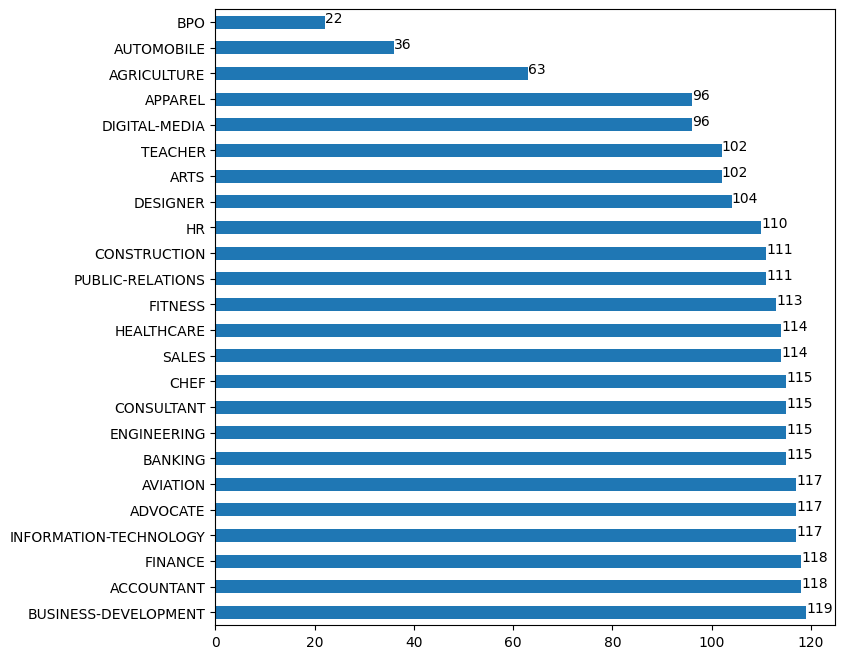

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

df.Category.value_counts().plot(kind='barh')

for index, value in enumerate(df.Category.value_counts().values):
    plt.text(value, index, str(value))

plt.show()